 # Prueba U de Mann-Whitney y Prueba H de Kruskal Wallis

### Librerías

In [1]:
!pip install pingouin
!pip install scipy
# Import standard packages
import numpy as np
import pandas as pd
import pingouin as pg
# additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.2 MB/s eta 0:00:00


#Ejercicios: Prueba U de Mann-Whitney



## Ejercicio 1
Se realizó un experimento para comparar las resistencias de dos tipos de papel de estraza: un papel de estraza estándar de un peso especificado y otro es el mismo papel tratado con una sustancia química. Piezas de cada tipo de papel, seleccionadas al azar de entre la producción, produjeron las mediciones de resistencia que se muestran en la tabla.
 Pruebe la hipótesis de que no hay diferencia en las distribuciones de
 resistencias para los dos tipos de papel, contra la hipótesis alternativa de que el papel tratado tiende a ser más fuerte. Use α = 0.05.


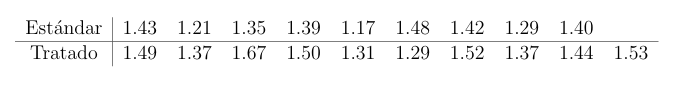

In [2]:
estandar = [1.21, 1.43,1.35,1.39,1.17,1.48,1.42,1.29,1.40]
tratado = [1.49,1.37,1.67,1.50,1.31,1.29,1.52,1.37,1.44,1.53]

## Contraste de Hipótesis

$H_{0}:P_{E}\neq P_{T}  \ \ \text{vs} \ \ H_{a}:P_{E}<P_{T} $

In [3]:
results = pg.mwu(estandar, tratado, alternative='less')
print(results)

     U-val alternative     p-val       RBC      CLES
MWU   23.5        less  0.043067 -0.477778  0.738889


## Conclusión

$p-Value<\alpha$, por lo tanto rechazamos $H_{0}$. Por lo tanto, $P_{T}> P_{E}.$  

## Ejercicio 2

 Los valores codificados para una medida de brillantez en papel (reflectividad ligera), elaborado por dos procesos diferentes, son como se
 muestra en la siguiente tabla para muestras de tamaño 13 obtenidas
 aleatoriamente de cada uno de los dos procesos. ¿Estos datos presentan
 suficiente evidencia para indicar una diferencia en la localización de las
 mediciones de brillantez para los dos procesos? Use α = 0.05.


 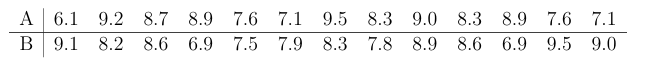

In [4]:
A=[6.1,9.2,8.7,8.9,7.6,7.1,9.5,8.3,9.0,8.3,8.9,7.6,7.1]
B=[9.1,8.2,8.6,6.9,7.5,7.9,8.3,7.8,8.9,8.6,6.9,9.5,9.0]

## Contraste de Hipótesis

$H_{0}: A =B  \ \ \text{vs} \ \ H_{a}:A \neq B $

In [5]:
results = pg.mwu(A,B)
print(results)

     U-val alternative     p-val       RBC      CLES
MWU   86.0   two-sided  0.959003  0.017751  0.508876


## Conclusión

$p-Value>\alpha$, por lo tanto no rechazamos $H_{0}$. Por lo tanto, $A=B.$  

## Ejercicio 3

Se encontró que el contenido de nicotina de dos marcas de cigarrillos,
 medido en miligramos, es el siguiente:

 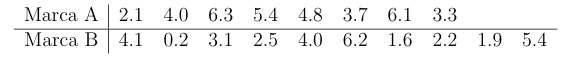

 A un nivel de significancia de 0.05 pruebe la hipótesis de que las medias
 del contenido de nicotina de las dos marcas son iguales, en comparación
 con la hipótesis alternativa de que la media de la marca A es mayor.

In [6]:
A=[2.1,4.0,6.3,5.4,4.8,3.7,6.1,3.3]
B=[4.1,0.2,3.1,2.5,4.0,6.2,1.6,2.2,1.9,5.4]

## Contraste de Hipótesis

$H_{0}: \mu_{A} =\mu_{B}  \ \ \text{vs} \ \ H_{a}:\mu_{A}> \mu_{B} $

In [7]:
results = pg.mwu(A,B, alternative='greater')
print(results)

     U-val alternative     p-val    RBC    CLES
MWU   57.0     greater  0.071109  0.425  0.7125


## Conclusión

$p-Value>\alpha$, por lo tanto no rechazamos $H_{0}$. Por lo tanto, $\mu_{A} =\mu_{B}$  

## Ejercicio 4

La Tucson State University ofrece dos programas de maestría en administración de empresas. En el primer programa, los estudiantes se
 reunen dos noches por semana en el campus principal, en el centro de
 Tucson. En el segundo programa, sólo se comunican por internet con
 el profesor. El director de la maestría de Tucson quiere comparar el
 número de horas que estudiaron la semana pasada los dos grupos. Una
 muestra de 10 estudiantes en el campus y otra de 12 estudiantes por
 internet reveló la siguiente información:

 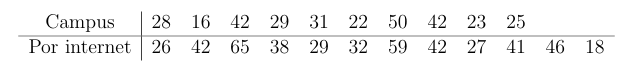

 A un nivel de significancia de 0.05, ¿es posible concluir que los estudiantes por internet estudian más?

In [8]:
Campus=[28,16,42,29,31,22,50,42,23,25]
Internet=[26,42,65,38,29,32,59,42,27,41,46,18]

## Contraste de Hipótesis

$H_{0}: \mu_{A} =\mu_{B}  \ \ \text{vs} \ \ H_{a}:\mu_{A}> \mu_{B} $

In [9]:
results = pg.mwu(A,B, alternative='greater')
print(results)

     U-val alternative     p-val    RBC    CLES
MWU   57.0     greater  0.071109  0.425  0.7125


## Conclusión

$p-Value>\alpha$, por lo tanto no rechazamos $H_{0}$. Por lo tanto, $\mu_{A} =\mu_{B}$  

# Ejercicios: Prueba H de Kruskal Wallis

## Ejercicio 1:

 Los empleados que contrata la empresa Williams Manufacturings para
 su departamento administrativo provienen de tres universidades. Re
cien el departamento de personal de la empresa ha empezado a revisar
 el desempeño anual para determinar si hay diferencia en el desempeño
 de los empleados provenientes de estas tres universidades. Se cuenta con
 los datos de muestras independientes de clasificación de acuerdo con su
 desempeño de siete empleados provenientes de la universidad A, seis
 de la universidad B y siete de la universidad C. Suponga que se desea
 probar si las tres poblaciones son idénticas respecto a las calificaciones
 por su desempeño. Use un nivel de significancia de 0.05.

 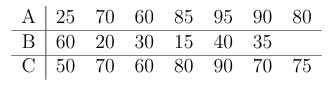

In [10]:
# Datos:
A = [25,70,60,85,95,90,80]
B = [60,20,30,15,40,35]
C = [50,70,60,80,90,70,75]

# Realizamos la Prueba H de Kruskal-Wallis
statistic, p_value = stats.kruskal(A, B, C)

# Mostramos los resultados
print(f'Estadístico H: {statistic}')
print(f'Valor p: {p_value}')

# Nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.")


Estadístico H: 8.983874458874453
Valor p: 0.011198927889247982
Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.


## Ejercicio 2

En un experimento para determinar cuál de tres diferentes sistemas
 de misiles es preferible, se mide la tasa de combustión del propulsor.
 Los datos, después de codificarlos, se presentan en la tabla. Utilice la
 prueba de Kruskal-Wallis y un nivel de significancia de 0.05 para probar
 la hipótesis de que las tasas de combustión del propulsor son iguales
 para los tres sistemas de misiles.

 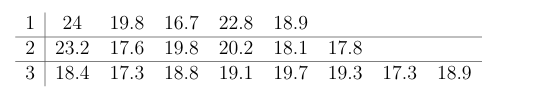

In [11]:
# Datos:
A1 = [24,19.8,16.7,22.8,18.9]
B2 = [23.2,17.6,19.8,20.2,18.1,17.8]
C3 = [18.4,17.3,18.8,19.1,19.7,19.3,17.3,18.9]

# Realizamos la Prueba H de Kruskal-Wallis
statistic, p_value = stats.kruskal(A1, B2, C3)

# Mostramos los resultados
print(f'Estadístico H: {statistic}')
print(f'Valor p: {p_value}')

# Nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.")


Estadístico H: 1.6629947229551505
Valor p: 0.4353968515051556
No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.


## Ejercicio 3

Se dan lascalificaciones del examen de aprovechamiento para cuatro
 diferentes grupos de estudiantes,donde cada grupo recibió enseñanza
 mediante una técnica diferente. El objetivo del experimento es probar la
 hipótesis de que no hay diferencia, en las distribuciones poblacionales de
 las calificaciones del examen de aprovechamiento, contra la alternativa
 de que difieren en ubicación. Use un nivel de significancia de 0.05.

 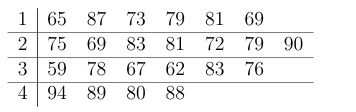



In [12]:
# Datos:
A = [65,87,73,79,81,69]
B = [75,69,83,81,72,79,90]
C = [59,78,67,62,83,76]
D = [94,89,80,88]

# Realizamos la Prueba H de Kruskal-Wallis
statistic, p_value = stats.kruskal(A, B, C,D)

# Mostramos los resultados
print(f'Estadístico H: {statistic}')
print(f'Valor p: {p_value}')

# Nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.")


Estadístico H: 7.790499764262136
Valor p: 0.05054580315774074
No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.


## Ejercicio 4

El Hospital System of the Carolinas opera tres hospitales en el área de Great Charlotte:

St. Luke's Memorial, en el lado poniente de la ciudad.
Swedish Medical Center, al sur.
Piedmont Hospital, en el lado este.
El director de administración está preocupado acerca del tiempo de espera de los pacientes con lesiones de tipo deportivo, que no ponen en peligro la vida y que llegan durante las tardes entre semana a los tres hospitales.

Específicamente, la pregunta es:

¿Existe una diferencia en los tiempos de espera en los tres hospitales?

Use un nivel de significancia de 0.05.

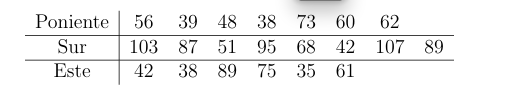

In [13]:
# Datos:
Poniente = [56,39,48,38,73,60,62]
Sur = [103,87,51,95,68,42,107,89]
Este = [42,38,89,75,35,61]

# Realizamos la Prueba H de Kruskal-Wallis
statistic, p_value = stats.kruskal(Poniente, Sur, Este)

# Mostramos los resultados
print(f'Estadístico H: {statistic}')
print(f'Valor p: {p_value}')

# Nivel de significancia
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.")


Estadístico H: 5.394088669950742
Valor p: 0.06740444356483703
No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos.
